In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.shape

(1258, 6)

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


### Cleaning the data

In [6]:
def clean(data):
    #drop date column
    df = data.copy()
    df.drop(['Date'],axis = 1,inplace = True)
    
    #remove commas(,) in the columns 'Volume' and 'Close'
    x = str(df['Volume'].dtypes)
    y = str(df['Close'].dtypes)
    
    if(x == 'object'):
        for i in range(0,df.shape[0]):
            df['Volume'].iloc[i] = df['Volume'].iloc[i].replace(',','')
    if(y == 'object'):
        for i in range(0,df.shape[0]):
            df['Close'].iloc[i] = df['Close'].iloc[i].replace(',','')
    
    #change datatype of 'Volume' and 'Close'
    df['Volume'] = pd.to_numeric(df['Volume'])
    df['Close'] = pd.to_numeric(df['Close'])
    
    return df

In [7]:
dataset_train = clean(dataset_train)

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_20812\4292940149.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'].iloc[i] = df['Volume'].iloc[i].replace(',','')
C:\Users\akshayd6\AppData\Local\Temp\ipykernel_20812\4292940149.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'].iloc[i] = df['Close'].iloc[i].replace(',','')


In [8]:
dataset_train.iloc[:,1:]

,High,Low,Close,Volume
0,332.83,324.97,663.59,7380500
1,333.87,329.08,666.45,5749400
2,330.75,326.89,657.21,6590300
3,328.77,323.68,648.24,5405900
4,322.29,309.46,620.76,11688800
...,...,...,...,...
1253,792.74,787.28,789.91,623400
1254,797.86,787.66,791.55,789100
1255,794.23,783.20,785.05,1153800
1256,785.93,778.92,782.79,744300


### Scaling the Data

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled_target = sc.fit_transform(dataset_train.iloc[:,0:1])

In [12]:
sc1 = MinMaxScaler()
training_set_scaled_data = sc1.fit_transform(dataset_train.iloc[:,1:])

In [19]:
training_set_scaled_target.shape

(1258, 1)

In [14]:
training_set_scaled_data

array([[0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09251685, 0.09408623, 0.22878051, 0.26361233],
       ...,
       [0.95807422, 0.95844067, 0.40495845, 0.04589107],
       [0.94257381, 0.95033338, 0.40184391, 0.02949139],
       [0.93669113, 0.93421352, 0.38672602, 0.07056868]])

In [27]:
final_train = np.concatenate((training_set_scaled_target,training_set_scaled_data),axis = 1)

In [28]:
final_train

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602, 0.07056868]])

### Transforming the data using 60 timesteps

In [29]:
X_train = []
y_train = []

In [30]:
for i in range(60,1258):
    X_train.append(final_train[i-60:i,0:5])
    y_train.append(final_train[i,0])

In [31]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [32]:
X_train.shape

(1198, 60, 5)

In [33]:
y_train.shape

(1198,)

### Build an LSTM

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [35]:
regressor = Sequential()

In [36]:
regressor.add(LSTM(units = 60,return_sequences = True,input_shape = (60,5)))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 60,return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 60,return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 60,return_sequences = True))
regressor.add(Dropout(rate = 0.2))
regressor.add(LSTM(units = 60))
regressor.add(Dropout(rate = 0.2))
regressor.add(Dense(units = 1))

In [122]:
regressor.compile(optimizer = 'Nadam', metrics = 'accuracy', loss = 'MeanSquaredError')

In [123]:
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Epoch 1/150
38/38 [==============================] - 12s 89ms/step - loss: 6.2578e-04 - accuracy: 0.0017
Epoch 2/150
38/38 [==============================] - 4s 112ms/step - loss: 7.6025e-04 - accuracy: 0.0017
Epoch 3/150
38/38 [==============================] - 5s 119ms/step - loss: 7.9030e-04 - accuracy: 0.0017
Epoch 4/150
38/38 [==============================] - 4s 102ms/step - loss: 6.8298e-04 - accuracy: 0.0017
Epoch 5/150
38/38 [==============================] - 4s 112ms/step - loss: 6.3601e-04 - accuracy: 0.0017
Epoch 6/150
38/38 [==============================] - 4s 102ms/step - loss: 7.5147e-04 - accuracy: 0.0017
Epoch 7/150
38/38 [==============================] - 4s 100ms/step - loss: 7.0363e-04 - accuracy: 0.0017
Epoch 8/150
38/38 [==============================] - 4s 101ms/step - loss: 6.5032e-04 - accuracy: 0.0017
Epoch 9/150
38/38 [==============================] - 4s 100ms/step - loss: 6.5823e-04 - accuracy: 0.0017
Epoch 10/150
38/38 [==============================] - 4

38/38 [==============================] - 4s 92ms/step - loss: 5.4952e-04 - accuracy: 0.0017
Epoch 79/150
38/38 [==============================] - 4s 93ms/step - loss: 5.6626e-04 - accuracy: 0.0017
Epoch 80/150
38/38 [==============================] - 4s 93ms/step - loss: 6.5021e-04 - accuracy: 0.0017
Epoch 81/150
38/38 [==============================] - 4s 93ms/step - loss: 5.8197e-04 - accuracy: 0.0017
Epoch 82/150
38/38 [==============================] - 4s 105ms/step - loss: 6.3537e-04 - accuracy: 0.0017
Epoch 83/150
38/38 [==============================] - 4s 96ms/step - loss: 6.3537e-04 - accuracy: 0.0017
Epoch 84/150
38/38 [==============================] - 4s 104ms/step - loss: 5.5634e-04 - accuracy: 0.0017
Epoch 85/150
38/38 [==============================] - 4s 94ms/step - loss: 6.2245e-04 - accuracy: 0.0017
Epoch 86/150
38/38 [==============================] - 4s 93ms/step - loss: 6.2510e-04 - accuracy: 0.0017
Epoch 87/150
38/38 [==============================] - 4s 103ms/ste

### Preparing the test data

In [39]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [40]:
dataset_test = clean(dataset_test)

C:\Users\akshayd6\AppData\Local\Temp\ipykernel_20812\4292940149.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'].iloc[i] = df['Volume'].iloc[i].replace(',','')


In [41]:
dataset_test.shape

(20, 5)

In [42]:
full_dataset = pd.concat((dataset_train,dataset_test),axis = 0)

In [43]:
full_dataset.shape

(1278, 5)

In [44]:
len(dataset_train)

1258

In [45]:
len(dataset_train) - len(dataset_test) - 60

1178

In [50]:
inputs = full_dataset[len(full_dataset) - len(dataset_test) - 60:]

In [51]:
inputs

,Open,High,Low,Close,Volume
1198,779.00,780.48,775.54,776.86,1070700
1199,779.66,779.66,770.75,775.08,933200
1200,777.71,789.38,775.87,785.94,1174900
1201,786.66,792.28,780.58,783.07,1372500
1202,783.76,788.13,782.06,786.14,937400
...,...,...,...,...,...
15,829.62,835.77,825.06,835.67,1494500
16,837.81,838.00,827.01,832.15,2973900
17,834.71,841.95,820.44,823.31,2965800
18,814.66,815.84,799.80,802.32,3246600


In [52]:
inputs.shape

(80, 5)

In [54]:
inputs_target = sc.transform(inputs.iloc[:,0:1])
inputs_data = sc1.transform(inputs.iloc[:,1:])

In [56]:
final_test = np.concatenate((inputs_target,inputs_data),axis = 1)

In [58]:
final_test.shape

(80, 5)

In [55]:
X_test = []
y_test = []

In [60]:
for i in range(60,80):
    X_test.append(final_test[i-60:i,0:5])
    y_test.append(final_test[i,0])

In [61]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [62]:
X_test.shape

(20, 60, 5)

### Obtain Predictions

In [124]:
preds = regressor.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [125]:
preds

array([[0.9389463 ],
       [0.94500124],
       [0.9491211 ],
       [0.95557463],
       [0.9642826 ],
       [0.9688045 ],
       [0.97227645],
       [0.97275496],
       [0.970687  ],
       [0.9732512 ],
       [0.9700286 ],
       [0.9690469 ],
       [0.96776956],
       [0.9687872 ],
       [0.9741317 ],
       [0.978155  ],
       [0.9833074 ],
       [0.98586655],
       [0.98621356],
       [0.96371484]], dtype=float32)

In [126]:
final_preds = sc.inverse_transform(preds)

In [127]:
final_preds = final_preds.reshape(20,)

In [128]:
final_preds

array([783.86   , 787.11487, 789.3295 , 792.79865, 797.47974, 799.9105 ,
       801.7769 , 802.0341 , 800.9225 , 802.3009 , 800.56854, 800.04083,
       799.3542 , 799.90125, 802.77423, 804.937  , 807.7067 , 809.0824 ,
       809.2689 , 797.1745 ], dtype=float32)

### Preparing y_test for visualization

In [111]:
y_test.shape

(20,)

In [112]:
original_values = sc.inverse_transform(y_test.reshape(-1,1))

In [113]:
original_values

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Visulaizing results

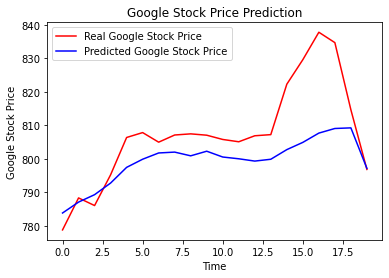

In [129]:
plt.plot(original_values, color = 'red', label = 'Real Google Stock Price')
plt.plot(final_preds, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()